# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- The Smartcab is stationary and doesn't move at all during the simulation. 
- The driving agent is rewarded positive value when the Smartcab being stopped at the red light or moved at the green light. 
- Here in our simulation, I can notice that initially the driving agent is receiving positive rewards as the smartcab is stationary with red light ON, but the rewards point goes negative when the smartcab is stationary with the red light OFF (or the red line disappears i.e green signal). 
- Our two main metrics of Safety and Reliability has been broken in our simulation as the Smartcab doesn't move causing possibility of accidents through other vehicle on its way and hence not reaching the destination on time.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In agents.py, `learning`, `epsilon` and `alpha` are the 3 flags which can be set to change the simulation.
    - learning: Whether the agent is expected to learn. This learning flag will determine whether the agent will perform `learning` or carry out `random action` as the next step.
    - epsilon: Random exploration factor. This is the value which directs the agent `to learn and take new risk` or to be `dumb and play by the books`. In other words, playing safe with the previous known moves.
    - alpha: Learning factor. This factor determine how much learning the agent would be trying. In other words, a value of 0.0 will make the agent to go by `the usual know behaviour` and a value of 1.0 will make the agent to `try all new learning` not carrying forward any old ones.
- In environment.py, the `act class function` is called when the agent performs an action.
- In simulator.py, there are two rendering functions to pipeline the results. The `render_text()` will output the results as text may be in a console and the `render()` will output the result in the form of GUI.
- In planner.py, the `next_waypoint()` function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


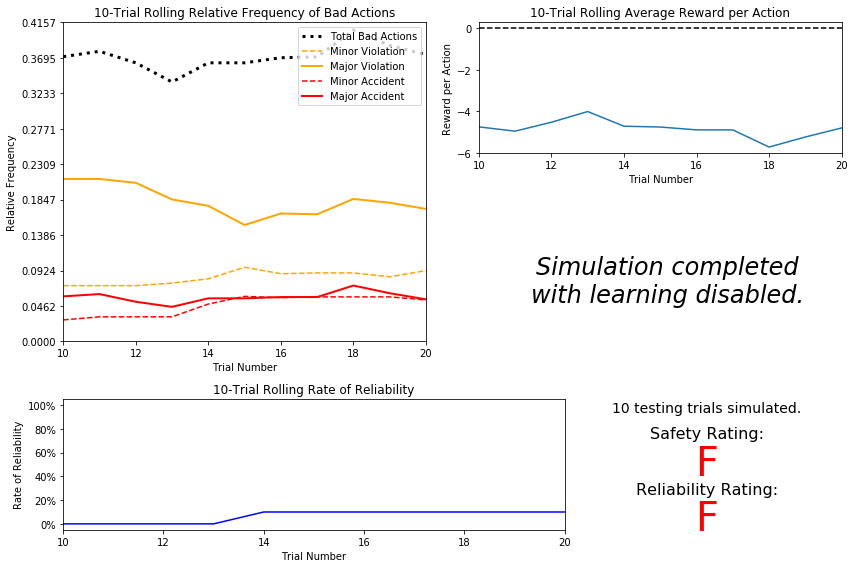

In [37]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- On an average, the driving agent is making bad decisions around 38% of the times. 
    - The Minor and Major Accidents both constitutes a total of around 9%. But the major and minor violations are one a different scale. The minor violation supports for around 9% and the major violation constitutes the dominant share of 20% on the average.
- Let us consider the agent is driving randomly. There are four actions - `None`, `forward`, `left` and `right`. As this is random, one of the 4 action is the correct action. Hence out of probability, the success action should atleast constitute 25% of the trial and hence the rate of reliability should be atleast 25%. But our case is little more understandable as there is more randomness and hence the rate of reliability is just around 15%.
- The average reward seems to be negative around -5 per action. This shows that the driving agent is continously taking bad decision and hence been penalized heavily.
- We can't exactly say that the increase in the number of trials is changing the outcome significantly. It is very clear that the driving agent is not learning and is making random decisions which won't help it to improve.
- Definitely the Smartcab is not considered safe and reliable for its passengers as it is not learning and taking random decisions for its action. No reliability and No learnability.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
- For ensuring `safety`, the Smartcab has to learn the traffic rules of the environment and avoid the accidents. 
    - Choosing the right `inputs`. 
    - The `light` is a very important feature which will help the driving agent to avoid accidents by maintaining the traffic regulations. The Smartcab should stop at `red` and move at `green`.
    - The `left/right` feature is important only when the vehicle needs to turn and change direction. The `left` feature is significant when the smartcab needs to turn left. But while moving right, the safety of the vehicle is not affected in any way. The learnability lies when the decision needs to be taken for turning right or left when the oncoming traffic is the conflicting assertion.
    - The `oncoming` feature is important to indicate the presence of vehicles from different roads and hence to avoid accidents. This is critical when the oncoming vehicle is having a upper hand in the state and our Smartcab should wait and take decision accordingly. For eaxample, in case of left turn and yeild when the oncoming traffic is forward. 
- For ensuring `efficiency`, it is more relavant to choose the right `waypoint` and the `deadline`. 
    - Though the above mentioned feature will definitely affect the efficiency of the Smartcab, it is also necessary to look at the `waypoint` and the `deadline` as the vehicle need to take the right decision at the right time in order to reach the destination earlier. This ensures efficiency. Sometimes it is better to engage a longer route instead of taking a route which has lot of oncoming traffic.
    
Having described each feature in detail, we need to select the right feature for modeling the Smartcab in the grid world/environment. Making the Smartcab to learn left rule and the right rule is fairly important, but when considering the right rule the decision of light is not much needed for a Smartcab to turn right. In case of `green` or `left` light, the right traffic won't interfer with the Smartcab's direction. In the same way, the `deadline` feature is a good to have one, but when the Smartcab focuses on choosing the correct waypoint, then it will automatically reach its destination in a safe and reliable manner. Hence we can remove `right` and `dealine` features from our list.  

Considering all the above things, to ensure safety I prefer to choose `light` and `oncoming` as the needed feature. To ensure reliability, I prefer to choose `waypoint`, `left` and `oncoming` again as the needed feature. On the total, my preferred features are `waypoint`, `light`, `left` and `oncoming`. And these are the ones i'm going to argue and implement in my code.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
- Let us calculate how much variables/features each of the state chosen from question 4 is having.
    - `waypoint`: it has 3 variables `forward`, `left` and `right`
    - `inputs`: This itself has 4 states in it.
        - `light`: it has 2 variables `red` and `green`
        - `left`: it has 4 variables `forward`, `left`, `right` and `None`
        - `right`: it has 4 variables `forward`, `left`, `right` and `None`
        - `oncoming`: it has 4 variables `forward`, `left`, `right` and `None`
        
As we have choosen only 3 features names `waypoint`, `light`, `left` and `oncoming`, the maximum possible states we are aiming would be `3 * 2 * 4 * 4 = 96` states. Since the minimum training trial is 20, I would like to keep the test trial number on the higher scale in order for the Q-learner to learn efficiently and take decisions accurately. The default test trial number of 10 won't be of much use in case of our improved learner.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

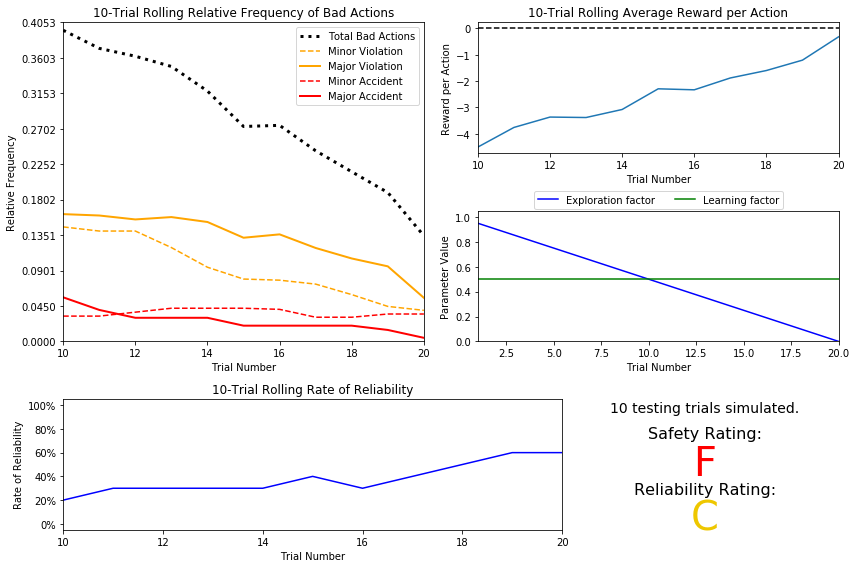

In [61]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- According to the 10 trial rolling relative frequency of bad actions we find:
    - the total number of bad actions has decreased from 38% for the basic agent to near 15% in the learnt agent.
    - Minor accidents and major accidents stays the same around 4% which explains that the learnt agent has not much tuned.
    - When comparing the 10-trial rolling average reward per action, the base agent was very consistent with -5 rewards throughout the trail. The learnt agent is far better in its ability to learn starting with -5 rewards per action and moving towards 0 points reward.
    - When comparing the rate of reliability, the base agent was just around 15%. The learnt agent has grown a lot on its reliability increasing its percentage to around 60%.
- The driving agent needed a minimum of 20 trials before it started testing. Both agents used epsilon value of 1.0 and it makes perfect sense to have this trial number. 
- Since we used a constant decay factor of 0.05 for the epsilon to decrease from 1 to 0, it accurately takes around 20 training trails before the driving agent require testing. This can be read from the learning factor graph in which a straight line goes from 0.0 to 1.0.
- As the number of training trials increase, the percentage of bad action definitely decreased significantly from around 40% to 15%. In case of base agent, the percentage of bad actions was increasing from 36% to 40%. With respect to rewards per action, there is again a significant increase from -5 to above 0. 
- There are similarity between the basic driving agent and the default Q-Learning agent. Both basic and the learnt agent have got 'F' rating in Safety. But the reliability has significantly improved from 'F' rating to 'C' rating. It is very evident that the driving agent is significantly reliable than the base agent. 

----------
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

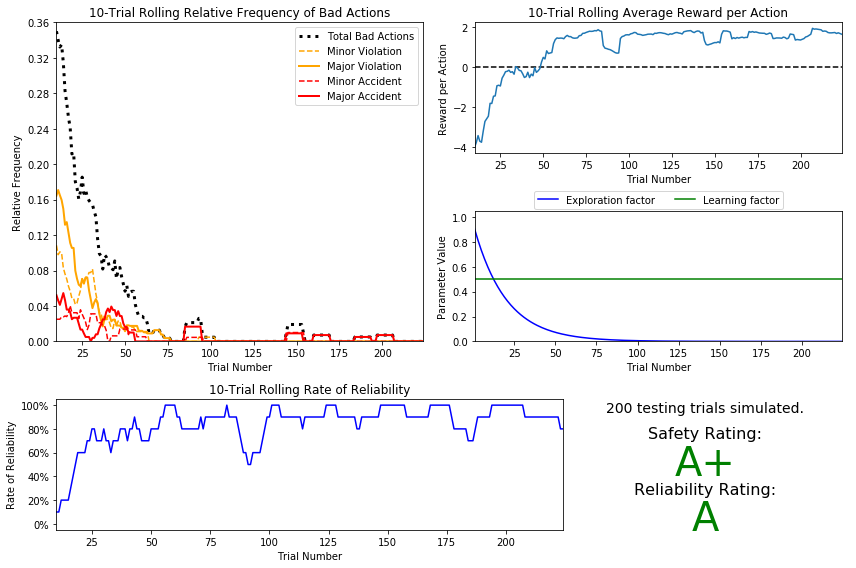

In [75]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- The decay function used for the exploration factor was $$ \epsilon = 0.95^t $$
- The driving agent usually begins testing when the decay function converges to 0. With the epsilon function, it takes 20 training trails for the decay function to reach 0 after which the driving agent begins to test.
- The epsilon-tolerance value will make sure that the driving agent will have the sufficient time to learn the environment during each move and the alpha value will make sure that the driving agent remembers its previous moves in a fair manner without any bias. Keeping this in mind, I used the epsilon-tolerance value as 0.00001 on 200 testing trials which will provide the sufficent time and the alpha value as 0.5 which again maintains the fair state.
- The improved Q-learner is much better in its performance compared to the default Q-learner. From the rolling relative frequency of bad decisions graph, we can see that the improved Q-learner quickly drops to 0% for the total bad actions providing a A+ rating for Safety and a A rating for Reliability.
- Definitely I can say that the driving agent successfully learnt the appropriate policies. I ran the simulation for 200 test trials in which the driving agent could able to show remarkable ability of driving skill. As we include 4 different features, it wasn't possible for the Q-learner to entirely learn all the policies within 10 default testing trials. The increament of 10 to 200 testing trials is much needed with a tolerance of 0.00001 as the improved learner is little slower in grasping all the policies.
- I'm quite satisfied with the safety and the reliability ratings of the Smartcab. This driving agent seems to be a perfect candidate for for the Smartcab achieving the atmost safety and reliability in very less trials.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
- Let us see what are the optimal policies for the Smartcab:
    - When the light is green and the smartcab should turn left, it should wait till the oncoming traffic gets cleared before taking the left turn.
    - When the light is red, the Smartcab can't move in any direction except right. But while taking right too, as explained earlier the cab has to be conscious on the oncoming vehicle turning left.
    - When the light is green and the smartcab should go straight, it can directly go without looking into any other feature.
    - All the learnt policy actions are not correct according to our optimal policy definition.
- Investigating the `sim_improved-learning.txt`. In most of the cases the smartcab has learnt the optimal policy.
- Correct Policy Observation and Demostration. Reference: (waypoint, light, left traffic, oncoming traffic).
- First example:
    - ('right', 'green', None, None)
    - -- forward : 0.77
    - -- None : -4.47
    - -- right : 1.36
    - -- left : 0.66
    - As expected since the waypoint is right and the light is green and the oncoming traffic is none, the Smartcab can take a right.
- Second example:
    - ('forward', 'red', 'forward', 'forward')
    - -- forward : -19.66
    - -- None : 2.13
    - -- right : 0.00
    - -- left : 0.00
    - As expected, when the light is red and the waypoint is forward, the vehicle should stay put as there is not way to move further.
- Third example:
    - ('right', 'red', None, None)
    - -- forward : -9.13
    - -- None : 0.76
    - -- right : 1.81
    - -- left : -12.69
    - As expected, when the light is red and the waypoint is right and there is no oncoming traffic, the vehicle can take the right which is given the maximum score.
- Few entries where I think the cab didn't learn the optimal policy.
    - ('left', 'green', 'forward', 'left')
    - -- forward : 0.88
    - -- None : 0.00
    - -- right : 0.00
    - -- left : 0.00
    - In this case, there is a potential chance of accident as the smartcab is directed to move forward on a green signal when it has to turn left. This is because of the left vehicles also moving forward and it has very high chance of accident with our Smartcab. The reinforcement learning will teach when to move forward and make the cab more smarter on more trials.
- Let us look on a very similar one.
    - ('left', 'green', 'left', 'right')
    - -- forward : 0.00
    - -- None : 0.00
    - -- right : 1.19
    - -- left : 0.00
    - This case is a little unexpected policy observation. Here the smartcab has to take a left on a green light. But due to the oncoming traffic which is turning right and the left traffic turning left, we need to find a different route for the cab. Here the suggested route is to take a right instead of a forward. Taking a right turn won't cause any accident but won't be efficient as it is taking a longer route. The forward should have taken precedence than the right in this case.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
- There are few characteristics which I have explained earlier.
       - While considering the issues with environment, the Smartcab doesn't have much knowledge on all the traffics and intersections. It has knowledge on just that intersection which it is crossing. Hence it is not possible for the cab to plan ahead and also the future reward plans are not feasible in this case.
       - With respect to the smartcab itself, for each move of the cab the entire environment changes. It is not possible to fix a reward for a particular position/action of the smartcab. In having this kind of dynamic property, the Smartcab itself can't support the future rewards which needs details like rewards on position etc. The cab doesn't know its future positions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.